In [8]:
from sisyphus2.backend.models.basic import Basic, BasicSigmoid, BasicScan
from sisyphus2.backend.models.lstm import LSTM
from sisyphus2.backend import task
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
rdm = task.RDM(N_in = 2, N_out = 2, dt = 10, tau = 100, T = 2000, N_batch = 32)
gen = rdm.batch_generator()
params = rdm.__dict__

In [22]:
params['loss_function'] = 'mean_squared_error'

In [23]:
params['name'] = 'model'
params['N_rec'] = 50

In [32]:
params['L2_in'] = 0.2
params['L2_rec'] = 0.2
params['L2_out'] = 0.2

In [35]:
model = BasicScan(params)

In [ ]:
model.build()
model.train(gen, {'save_weights_path': '../weights/refactor_weights.npz'})

In [26]:
x,y,m = gen.next()

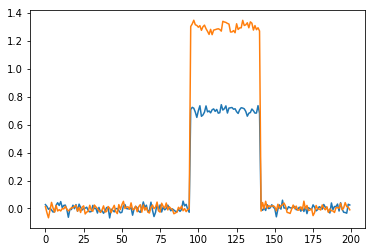

In [27]:
plt.plot(x[0,:,:])

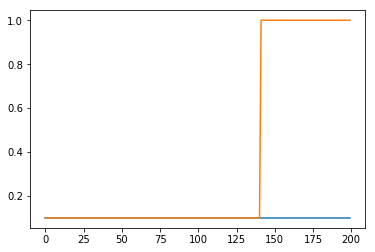

In [28]:
plt.plot(y[0,:,:])

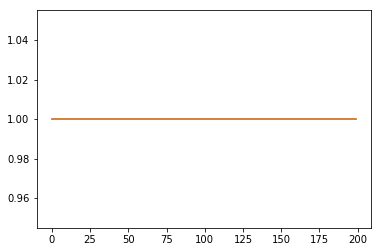

In [29]:
plt.plot(m[0,:,:])

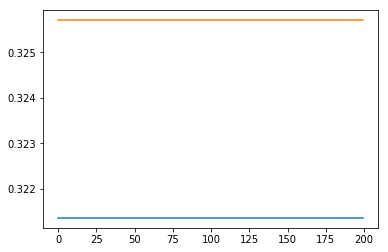

In [30]:
plt.plot(model.test(x)[0][0,:,:])

In [34]:
model.destruct()